# How to set up a simple fitting procedure with scipy.optimize

For this case, we'll examine fake data that follows a linear trend  ($y = mx + b$) and fit it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

## First, load your dataset

In this case, I'm going to simulate a light curve with Poisson (counting) statistics.

Text(0, 0.5, 'y')

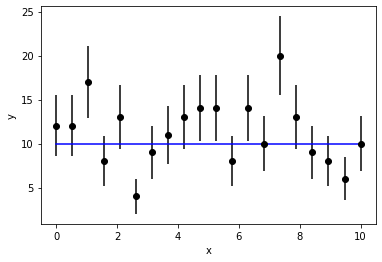

In [2]:
M0, B0 = 0.0, 10.0 # True m and b values for the data

x = np.linspace(0, 10, 20) # "time" dimension for light curve
truth = M0 * x + B0 # the true trend that our data will follow

y = np.random.poisson(truth)
yerr = np.sqrt(y)

plt.errorbar(x, y, yerr, color='k', marker='o', ls='')
plt.plot(x, truth, color='b')
plt.xlabel('x')
plt.ylabel('y')

## Now you can fit

[-0.09619001 10.36474969]
1.5180003977350123


Text(0, 0.5, 'y')

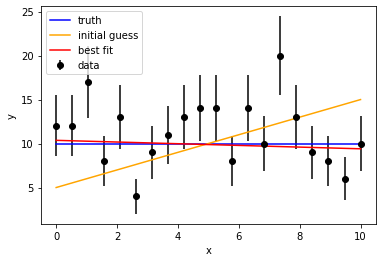

In [3]:
# Step 1: Define your model
def my_model(pars):
    m, b = pars
    return m * x + b

# Step 2: Define the fit statistic you want to use
# In this case, we're using reduced chi-squared
def my_chisq(pars):
    model = my_model(pars)
    return np.sum((y - model)**2 / (yerr)**2 / (len(x) - len(pars)))

# Step 3: Define the optimization method you want to use
p0 = [1.0, 5.0] # initial guess for the parameters
pbest = scipy.optimize.minimize(my_chisq, p0)

# Print the parameters that worked best
print(pbest.x)

# Print the reduced chi-squared from this fit
print(my_chisq(pbest.x))

plt.errorbar(x, y, yerr, marker='o', ls='', color='k', label='data')
plt.plot(x, truth, color='b', label='truth')
plt.plot(x, my_model(p0), color='orange', label='initial guess')
plt.plot(x, my_model(pbest.x), color='r', label='best fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')